## Clustering NRPA Data 

The following notebook will utilize a Kmeans cluster analysis to determine the top ten peer cities to Missoula, MT based on 21 different parks related variables.  The data was gathered by the National Recreation and Park Association (NRPA) per the association's annual park metrics survey.  For this analysis, I will only use FY 2022 data.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from collections import defaultdict
from pprint import pprint

In [4]:
nrpa_data = pd.read_csv("/Users/krusty/Desktop/Capstone/NRPA 2022 Numbers.csv")
nrpa_clean = pd.read_csv("/Users/krusty/Desktop/Capstone/nrpa_clean.csv")

In [5]:
# read the CSV file into a DataFrame
nrpa_clean = pd.read_csv("/Users/krusty/Desktop/Capstone/nrpa_clean.csv")

# replace the dollar sign with an empty string in the entire DataFrame
nrpa_clean = nrpa_clean.replace({'\$': '', ',':''}, regex=True)

# drop all rows with null values
nrpa_clean = nrpa_clean.dropna()

In [6]:
nrpa_data

,Agency,Year,Region,Country,Operating expenditures per capita,Revenue per capita,Total revenue to total operating expenditures,Total tax expenditures per capita,Park operating expenditures per acre of parkland,Operating expenditures per acre of parkland,...,STEM Programs,Have a policy barring the use of all tobacco products in its parks and at its facilities and grounds?,Have a policy that allows the consumption of alcohol by legal-aged adults on its premises?,Sell alcoholic beverages to legal-aged adults on its premises (sold by the agency or concessionaire authorized by the agency)?,Provide healthy food options in its vending machines?,Provide healthy food options at its concession stands?,Charge a parking fee at its parks or facilities?,Charge an admission fee to enter its parks?,"Have an expressed commitment to diversity, equity and inclusion (DEI) in vision, mission and/or strategic plan documents?",Have hiring practices and policies that promote a diverse agency workforce?
0,Sussex Parks and Recreation,2022,WI,United States,$133,$31,23.1%,$102,"$1,083","$3,186",...,Yes,No,"Yes, at all locations","Yes, at select locations",NaN,NaN,No,No,"Yes, at all locations","Yes, at all locations"
1,Springfield-Greene County Park Board,2022,MO,United States,$111,$50,44.5%,$62,"$5,766","$10,483",...,No,"Yes, at all locations","Yes, at select locations","Yes, at select locations",No,"Yes, at select locations",No,"Yes, at select locations",NaN,NaN
2,Bemidji Parks and Recreation,2022,MN,United States,$76,$11,14.6%,$65,"$3,960","$4,658",...,Yes,"Yes, at all locations","Yes, at select locations",No,No,"Yes, at select locations",No,No,"Yes, at all locations",No
3,Hoffman Estates Park District,2022,IL,United States,$316,$203,64.2%,$113,"$4,245","$18,457",...,Yes,"Yes, at select locations","Yes, at select locations","Yes, at select locations","Yes, at all locations","Yes, at all locations",No,"Yes, at select locations","Yes, at all locations","Yes, at all locations"
4,Redmond Area Park and Recreation District,2022,NaN,NaN,$39,$13,34.1%,$26,"$2,128","$23,647",...,Yes,"Yes, at all locations","Yes, at select locations",No,"Yes, at all locations",NaN,No,No,"Yes, at all locations","Yes, at all locations"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,Carlisle Parks and Recreation,2022,PA,United States,$70,$18,25.6%,$52,"$5,304","$8,037",...,Yes,"Yes, at all locations","Yes, at select locations","Yes, at select locations","Yes, at select locations",NaN,No,No,"Yes, at all locations","Yes, at all locations"
627,Macedonia Parks & Recreation,2022,OH,United States,$188,$71,37.9%,$117,"$2,095","$6,548",...,Yes,"Yes, at all locations",No,No,NaN,NaN,No,No,"Yes, at all locations","Yes, at all locations"
628,Baltimore City Recreation and Parks,2022,MD,United States,$97,$4,3.9%,$93,"$4,922","$11,446",...,Yes,"Yes, at all locations",No,No,NaN,"Yes, at select locations",No,No,"Yes, at all locations","Yes, at all locations"
629,Sycamore Park District,2022,IL,United States,$261,$118,45.2%,$143,$558,"$7,967",...,Yes,"Yes, at select locations","Yes, at select locations","Yes, at select locations","Yes, at all locations","Yes, at all locations",No,No,"Yes, at all locations","Yes, at all locations"


In [7]:
nrpa_clean

,Operating expenditures per capita,Revenue per capita,"FTE's per 10,000 population",Number of residents per park,Number of acres per park,Number of participants per program,Current Year Jurisdiction total operating budget,Current Year Jurisdiction annual capital budget,Population of jurisdiction,What were the total operating expenditures for your agency during Current Fiscal Year?,...,Capital budget for Current Fiscal Year,Number of full-time employees,Number of non-full-time employees,Total number of full-time equivalent employees (FTEs),Total number of parks,Total park acres,Total number of non-park sites,Please estimate the total number of trail miles managed or maintained by your agenc,Total number of programs offered,Number of fee based programs
0,133,31,40,919,38,17,8519046,2051959,13782,1828611,...,2333811,42,33,55,15,574,3,5,175,150
1,111,50,10,2760,29,334,572421277,1120000,287000,31899826,...,1120000,270,700,284,104,3043,20,69,1075,870
3,316,203,27,657,11,8,16611139,8664122,52530,16611139,...,713000,73,437,144,80,900,6,14,2663,2520
5,121,2,13,3043,82,1059,1427843042,420780000,194736,23588564,...,8790000,150,319,259,64,5219,14,47,156,155
6,131,21,14,4815,24,4,614700000,250676778,332258,43574635,...,10927676,204,908,462,69,1639,76,232,19995,19774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,70,18,5,1119,10,22,1221373,693100,20144,1414425,...,693100,5,52,10,18,176,0,20,164,157
627,188,71,19,4068,117,167,35689552,6685168,12203,2291745,...,1252000,11,77,23,3,350,2,3,30,28
628,97,4,6,2096,18,59,59851883,32250000,576498,55863126,...,32250000,337,457,337,275,4881,0,140,2265,638
629,261,118,26,925,30,6,7054897,2134430,18500,4820003,...,2134430,21,55,47,20,605,0,10,46,230


In [51]:
print(nrpa_clean.columns)

Index(['Operating expenditures per capita', 'Revenue per capita',
       'FTE's per 10,000 population', 'Number of residents per park',
       'Number of acres per park', 'Number of participants per program',
       'Current Year Jurisdiction total operating budget',
       'Current Year Jurisdiction annual capital budget',
       'Population of jurisdiction',
       'What were the total operating expenditures for your agency during Current Fiscal Year?',
       'Please estimate your agency's TOTAL non-tax revenues for Fiscal Year Current Yea',
       ' Capital budget for Current Fiscal Year',
       ' Number of full-time employees', ' Number of non-full-time employees',
       ' Total number of full-time equivalent employees (FTEs)',
       ' Total number of parks', ' Total park acres',
       ' Total number of non-park sites',
       'Please estimate the total number of trail miles managed or maintained by your agenc',
       ' Total number of programs offered', ' Number of fee based

In [8]:
#rename columns to be more succinct 
current_names = nrpa_clean.columns
new_names = "op_cap rev_cap fte_pop res_park acres_park num_par cur_op cur_cap population op_exp rev cap_bud num_ft num_nonft tot_fte tot_parks tot_acres num_nonpark trail num_pro num_fee ".split()

In [9]:
example_data = nrpa_clean.rename(columns = dict(zip(current_names,new_names)))

In [10]:
example_data

,op_cap,rev_cap,fte_pop,res_park,acres_park,num_par,cur_op,cur_cap,population,op_exp,...,cap_bud,num_ft,num_nonft,tot_fte,tot_parks,tot_acres,num_nonpark,trail,num_pro,num_fee
0,133,31,40,919,38,17,8519046,2051959,13782,1828611,...,2333811,42,33,55,15,574,3,5,175,150
1,111,50,10,2760,29,334,572421277,1120000,287000,31899826,...,1120000,270,700,284,104,3043,20,69,1075,870
3,316,203,27,657,11,8,16611139,8664122,52530,16611139,...,713000,73,437,144,80,900,6,14,2663,2520
5,121,2,13,3043,82,1059,1427843042,420780000,194736,23588564,...,8790000,150,319,259,64,5219,14,47,156,155
6,131,21,14,4815,24,4,614700000,250676778,332258,43574635,...,10927676,204,908,462,69,1639,76,232,19995,19774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,70,18,5,1119,10,22,1221373,693100,20144,1414425,...,693100,5,52,10,18,176,0,20,164,157
627,188,71,19,4068,117,167,35689552,6685168,12203,2291745,...,1252000,11,77,23,3,350,2,3,30,28
628,97,4,6,2096,18,59,59851883,32250000,576498,55863126,...,32250000,337,457,337,275,4881,0,140,2265,638
629,261,118,26,925,30,6,7054897,2134430,18500,4820003,...,2134430,21,55,47,20,605,0,10,46,230


### Setting Up the Cluster 

In the below code chunk, I set up our analysis for K-means clustering based upon the above variables.  First, the optimal number of clusters is determined via the elbow method. This will fit K-means models with different numbers of clusters and plotting the distortion.  Based upon the output of the elbow plot, I am going to focus on 2 different clusters as there is a sharp decline after 2. 

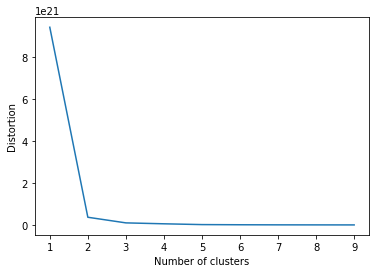

In [11]:
# Extract the variables for clustering
X = example_data[["op_cap", "rev_cap", "fte_pop", 'res_park', 'acres_park', 'num_par', 'cur_op','cur_cap','population','op_exp', 'rev', 'cap_bud', 'num_ft', 'num_nonft', 'tot_fte', 'tot_parks', 'tot_acres', 'num_nonpark' , 'trail', 'num_pro', 'num_fee'   ]]


# Choose the number of clusters using the elbow method
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
# Plot the elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 10), distortions)
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

# Fit the k-means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.predict(X)

# Add the labels to the original dataset
example_data["Cluster"] = labels

### Testing Cluster Significance 

Silhouette index: Measures how similar a point is to the cluster it is associated with.  The value of the Silhouette score is bounded from -1 to 1, where a higher score means more distinct clusters

Calinski-Harabasz index: compares variance both within and between clusters.  This score is not bounded like the Silhouette score, but a higher value also indicates better clustering results


References:
https://tomron.net/2016/11/30/davies-bouldin-index/
https://medium.com/mlearning-ai/deciding-number-of-clusters-using-gap-statistics-davies-bouldin-index-calinski-harabasz-index-2ce9acfb6118

In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("The average Silhouette score is :", silhouette_avg)

The average Silhouette score is : 0.943575525996443


In [13]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X, labels)
print("The Calinski-Harabasz Index is: ", ch_score)

The Calinski-Harabasz Index is:  13818.10929582716


In [12]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)


In [13]:
#Set up our K-Means model
clustering = km.fit_predict(example_data)

In [14]:
example_data['cluster'] = clustering

In [15]:
for cluster in set(clustering) :
    print(f'Printing Results for Cluster {cluster}.\n\n')
    
    print(example_data.query(f"cluster == {cluster}"))
    
    print("\n\n")
    

Printing Results for Cluster 0.


    op_cap rev_cap fte_pop res_park acres_park num_par      cur_op    cur_cap  \
0      133      31      40      919         38      17     8519046    2051959   
1      111      50      10     2760         29     334   572421277    1120000   
3      316     203      27      657         11       8    16611139    8664122   
5      121       2      13     3043         82    1059  1427843042  420780000   
6      131      21      14     4815         24       4   614700000  250676778   
..     ...     ...     ...      ...        ...     ...         ...        ...   
626     70      18       5     1119         10      22     1221373     693100   
627    188      71      19     4068        117     167    35689552    6685168   
628     97       4       6     2096         18      59    59851883   32250000   
629    261     118      26      925         30       6     7054897    2134430   
630      3       6       0     8000          3       1      100000     1000

In [16]:
cluster0 = example_data.loc[example_data['Cluster'] == 0]
cluster1 = example_data.loc[example_data['Cluster'] == 1]
cluster2 = example_data.loc[example_data['Cluster'] == 2]

In [17]:
population = '74822'  
if population in cluster0['population'].values:
    print(population, 'is in cluster 0')
else:
    print(population, 'is not in cluster 0')

74822 is in cluster 0


In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Convert non-numeric values to NaN
cluster_data = example_data[["op_cap", "rev_cap", "fte_pop", 'res_park', 'acres_park', 'num_par', 'cur_op','cur_cap','population','op_exp', 'rev', 'cap_bud', 'num_ft', 'num_nonft', 'tot_fte', 'tot_parks', 'tot_acres', 'num_nonpark' , 'trail', 'num_pro', 'num_fee']].apply(pd.to_numeric, errors='coerce')

# Fill in NaN values with 0
cluster_data = cluster_data.fillna(0)

# Cluster data using KMeans
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(cluster_data)
cluster_labels = kmeans2.labels_

# Calculate distances
missoula_cluster = [142,28,15,1227, 11, 141, 178793937, 40419580, 74822, 10617012, 2123402, 5621422, 54, 593, 111, 61, 686, 170, 79, 306, 299]
distances = []
for i in range(len(cluster_data)):
    city = cluster_data.iloc[i]
    dist = np.linalg.norm(city - missoula_cluster)
    distances.append(dist)

# Add distances to dataframe
example_data['Distance to Missoula'] = distances

# Sort by distance and select top ten closest cities
closest_cities = example_data.sort_values('Distance to Missoula').head(11)



In [18]:
# Convert non-numeric values to NaN
cluster_data = example_data[["op_cap", "rev_cap", "fte_pop", 'res_park', 'acres_park', 'num_par', 'cur_op','cur_cap','population','op_exp', 'rev', 'cap_bud', 'num_ft', 'num_nonft', 'tot_fte', 'tot_parks', 'tot_acres', 'num_nonpark' , 'trail', 'num_pro', 'num_fee']].apply(pd.to_numeric, errors='coerce')

# Fill in NaN values with 0
cluster_data = cluster_data.fillna(0)

# Cluster data using KMeans
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(cluster_data)
cluster_labels = kmeans2.labels_

# Calculate distances with min-max scaling
from sklearn.preprocessing import MinMaxScaler

missoula_cluster = [142,28,15,1227, 11, 141, 178793937, 40419580, 74822, 10617012, 2123402, 5621422, 54, 593, 111, 61, 686, 170, 79, 306, 299]

# Scale the cluster data to be between 0 and 1
scaler = MinMaxScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

distances = []
for i in range(len(cluster_data_scaled)):
    city_scaled = cluster_data_scaled[i]
    dist = np.linalg.norm(city_scaled - missoula_cluster)
    distances.append(dist)

    # Add distances to dataframe
example_data['Distance to Missoula'] = distances

# Sort by distance and select top ten closest cities
closest_cities = example_data.sort_values('Distance to Missoula').head(11)

In [20]:
closest_cities.to_csv('closestNRPAcities.csv', index=False)

In [19]:
print(closest_cities)

    op_cap rev_cap fte_pop res_park acres_park num_par       cur_op  \
620     11       4       1   156747       1575       9  95710715061   
222     74      12       7     8734         48      15   5626521000   
54      49      14       4    15651         85     255   5989209333   
30     281      35      10     3757         18      13  14000000000   
235      4       3       0   243857       1022      25   7853861783   
358     60      14       6     2209         34     224   1066054963   
301     81       0       8     6089         17      25    693656493   
269    146      68      16    10204         49       6   2300436094   
258     75      10       5     3088         43      18   1537295017   
236     98      35      10     5395         22     105    685000000   
369     37       2       1    33012         21      11    106055593   

        cur_cap population     op_exp  ... tot_fte tot_parks tot_acres  \
620   109675945   11756058  124728535  ...     755        75    118152   

### Closest Cities per NRPA Data                            

226 Missoula                 

87  Davenport, IA             

500  Brownsville, TX          

127  Westerville, OH           

243 North Port, FL           

249 James City County, VA    

331 Longview, TX    

501 Chatham, NC     

149 Lee's Summit, MO       

469 Farmer's Branch, TX    

408 Rancho Cucamonga, CA   

After normalizing data: 

620   Ohio State Parks and Watercraft      
222   Phoenix, AZ    
54    Palm Beach County, FL      
30    Pueblo, CO 

235   San Bernadino, CA     
358   Columbus, OH    
301   NYC Parks  
269   Loudon County, VA          
258   Fort Worth, TX      
236   Scottsdale, AZ        
369   Las Vegas, NV 


### Appendix: Variable Names and Description

Every year, the National Recreation and Park Association (NRPA) conducts an Agency Performance Survey based upon Park Metrics set by the association.  As of 2022, there are 32 different questions with 181 inputs regarding the areas of ‘jurisdiction information,’ ‘operating budget,’ ‘capital budget,’ ‘personnel,’ ‘agency responsibilities,’ ‘workload,’ ‘facilities,’ ‘activities,’ and ‘policies.’  There are also options to write additional comments or explain ‘other’ selections. The reporting covers the years 2008-2023 and each agency enters its own data.  

To best compare jurisdiction and to understand variation between the clusters performed, the following variables were chosen.  These are the columns of the dataset with descriptions: 

* 'op_cap' : Operating expenditures per capita
* 'rev_cap': Revenue per capita
* 'fte_pop' : FTE's per 10,000 population
* 'res_park' : Number of residents per park
* 'acres_park' : Number of acres per park
* 'num_par' : Number of participants per program
* 'cur_op' : Current Year Jurisdiction total operating budget
* 'cur_cap' : Current Year Jurisdiction annual capital budget
* 'population' : Population of jurisdiction
* 'op_exp' :'Total operating expenditures during Current Fiscal Year
* 'rev' :' Total non-tax revenues for Fiscal Year Current Year (estimate)
* 'cap_bud' : Capital budget for Current Fiscal Year
* 'num_ft' : Number of full-time employees
* 'num_nonft' :Number of non-full-time employees
* 'tot_fte': Total number of full-time equivalent employees (FTEs)
* 'tot_parks' : Total number of parks 
* 'tot_acres' : Total park acres
* 'num_nonpark' : Total number of non-park sites
* 'trail' :  Total number of trail miles managed or maintained by agency (estimate)
* 'num_pro':  Total number of programs offered
* 'num_fee' : Number of fee based programs